# Modeling Distributions

### Introduction

Now so far we have seen how to work with probability distributions that we derived directly from the sample of our population.  Our model of our probability distribution function of our random variable simply equaled the relative frequencies in our sample.  In this lesson, we'll see the limitations of this approach, and how we can improve upon it.

### Loading the data

Let's begin by loading up our data, and then we can plot our distribution function.

In [91]:
import pandas as pd 

df = pd.read_csv('./scores_grade_eight_2015.csv', index_col = 0)

In [92]:
df.shape

(472, 8)

In [110]:
from numpy.random import default_rng, seed
seed(3)
rng = default_rng()
numbers = rng.choice(range(0, 471), size=100, replace=False)

numbers = sorted(numbers)

sample_df = df.iloc[numbers]

Text(0.5, 1.0, 'average math scores')

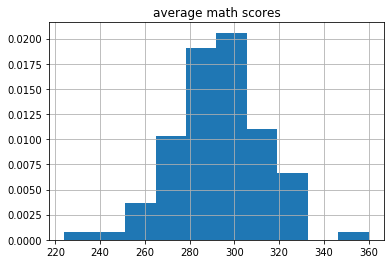

In [112]:
import matplotlib.pyplot as plt
ax = avg_score.hist(density = True)
ax.set_title('average math scores')
# height.hist(ax = ax, bins = 20)

The above is our probability density function.

Now, one problem with the above, is that we don't really *believe* the probability density function above.  After all, do we really believe that $P(X = 340) = 0$, as displayed above?  Probably not.

Instead, we use our sample to create model of the distribution with one of some predefined distributions.  For. the data above, it looks like the normal distribution can do a pretty good job.

You may have seen the normal distribution before.

<img src="./normal-dist.png" width="60%">

The normal distribution is the bell curve.  It's symmetric about the mean and it's PDF returns smaller and smaller probabilities the further it gets from the mean.  We can plot it using scipy like so.

In [118]:
import scipy.stats as stats
import numpy as np
norm_dist = stats.norm()

In [121]:
x = np.linspace(norm_dist.ppf(0.01), norm_dist.ppf(0.99), 100)
pdf_nums_norm = norm_dist.pdf(x)

Then we can plot this distribution.

[Text(0.5, 1.0, 'normal distribution')]

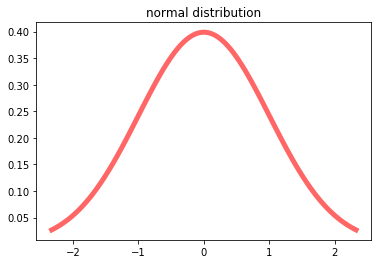

In [126]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pdf_nums_norm,
'r-', lw=5, alpha=0.6, label='norm pdf')
ax.set(title = 'normal distribution')

Now the above is the standard normal distribution.  The standard normal distribution has a mean of 0, and a standard deviation of 1.

### From sample to model

Now let's use the normal distribution to model distribution of math scores among NYC schools.  To do so, we'll want to create a normal distribution, with the same location and spread in our NYC school sample.

In [129]:
df['Mean Scale Score'].mean()

290.72281449893393

In [130]:
df['Mean Scale Score'].std()

20.553659493078015

Now we can create initialize a normal distribution with these same parameters.

In [154]:
school_scores_norm = stats.norm(df['Mean Scale Score'].mean(), df['Mean Scale Score'].std())

In [140]:
x = np.linspace(school_scores_norm.ppf(0.001), school_scores_norm.ppf(0.999), 100)
school_scores_norm = school_scores_norm.pdf(x)

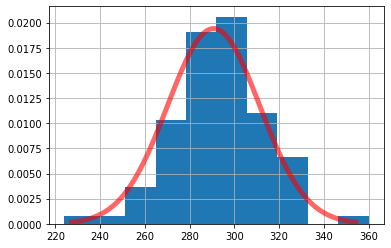

In [141]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig_schools = plt.figure()
ax_schools = fig_schools.add_subplot(111)
ax_schools = avg_score.hist(density = True)

ax_schools.plot(x, school_scores_norm,
'r-', lw=5, alpha=0.6, label='norm pdf')

This looks pretty good.

Now that we have this `schools_score_norm`, is also what we get with the `stats.norm.fit` function. 

In [149]:
stats.norm.fit(df['Mean Scale Score'].dropna())

(290.72281449893393, 20.531735583379273)

Ok, now *instead of using our sample, we can use this model*.

For example, let's see the likelihood that a school has a score of 310.

In [156]:
school_scores_norm.pdf(310)

0.012502813816575269

And what about the probability that a school has less than 310.

In [157]:
school_scores_norm.cdf(310)

0.8258509514271425

So there is a .82 probability that a school's score is less than 310.

### Summary

### Resources

[Distributions Overview](http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm)